### Tema: Valuacion de una opcion euroasiatica con precio de ejercicio fijo y flotante con una media geometrica mediante el modelo "Monte Carlo"

Descripción:
Una empresa consumidora de maiz amarillo, pretende comprarlo anticipadamente y por varias razones quiere proteger el precio de este, mediante una opcion Asiatica Europea.Por lo que en el desarrollo del proyecto obtendremos el precio justo de la opcion apoyados en el Modelo Monte Carlo, para que la empresa firme en posicion larga( Long Call) sin arbitraje.

## Opcion Asiatica

Fue el Banco Trust de Tokio la primera institucion financiera que ofrecio este tipo de opciones, por lo que se les denominaopciones asiaticas.

Se denominan opciones asiáticas a aquéllas cuyo valor depende del promedio de los
valores que ha tenido el subyacente durante la vida (o parte de ella) de la opción.
* Call asiática. Valor en la fecha de ejercicio: Max (0; Spromedio - K)
* Put asiática. Valor en la fecha de ejercicio: Max (0; K - Spromedio )

Este tipo de opciones tomaron un gran auge en el ambito financiero gracias a que son una forma de mantener controlado el precio de ejercircio, evitando grades cambios que perjudiquen a las pocisiones, ya que en una europea comun si al tiempo de maduracion el St cambia mucho, esto podia mover a la opcion de estar In the money a estar Out the money.

## Monte Carlo

El método Montecarlo es un método numérico que permite resolver problemas físicos y matemáticos mediante la simulación de variables aleatorias. ... La base es la generación de números aleatorios de los que nos serviremos para calcular probabilidades.

A continuacion se presenta el preceso para la valuacion de la opcion Euro
asiatica con media geometrica y K fijo. 

 # Activo subyacente: Maiz Amarillo, 
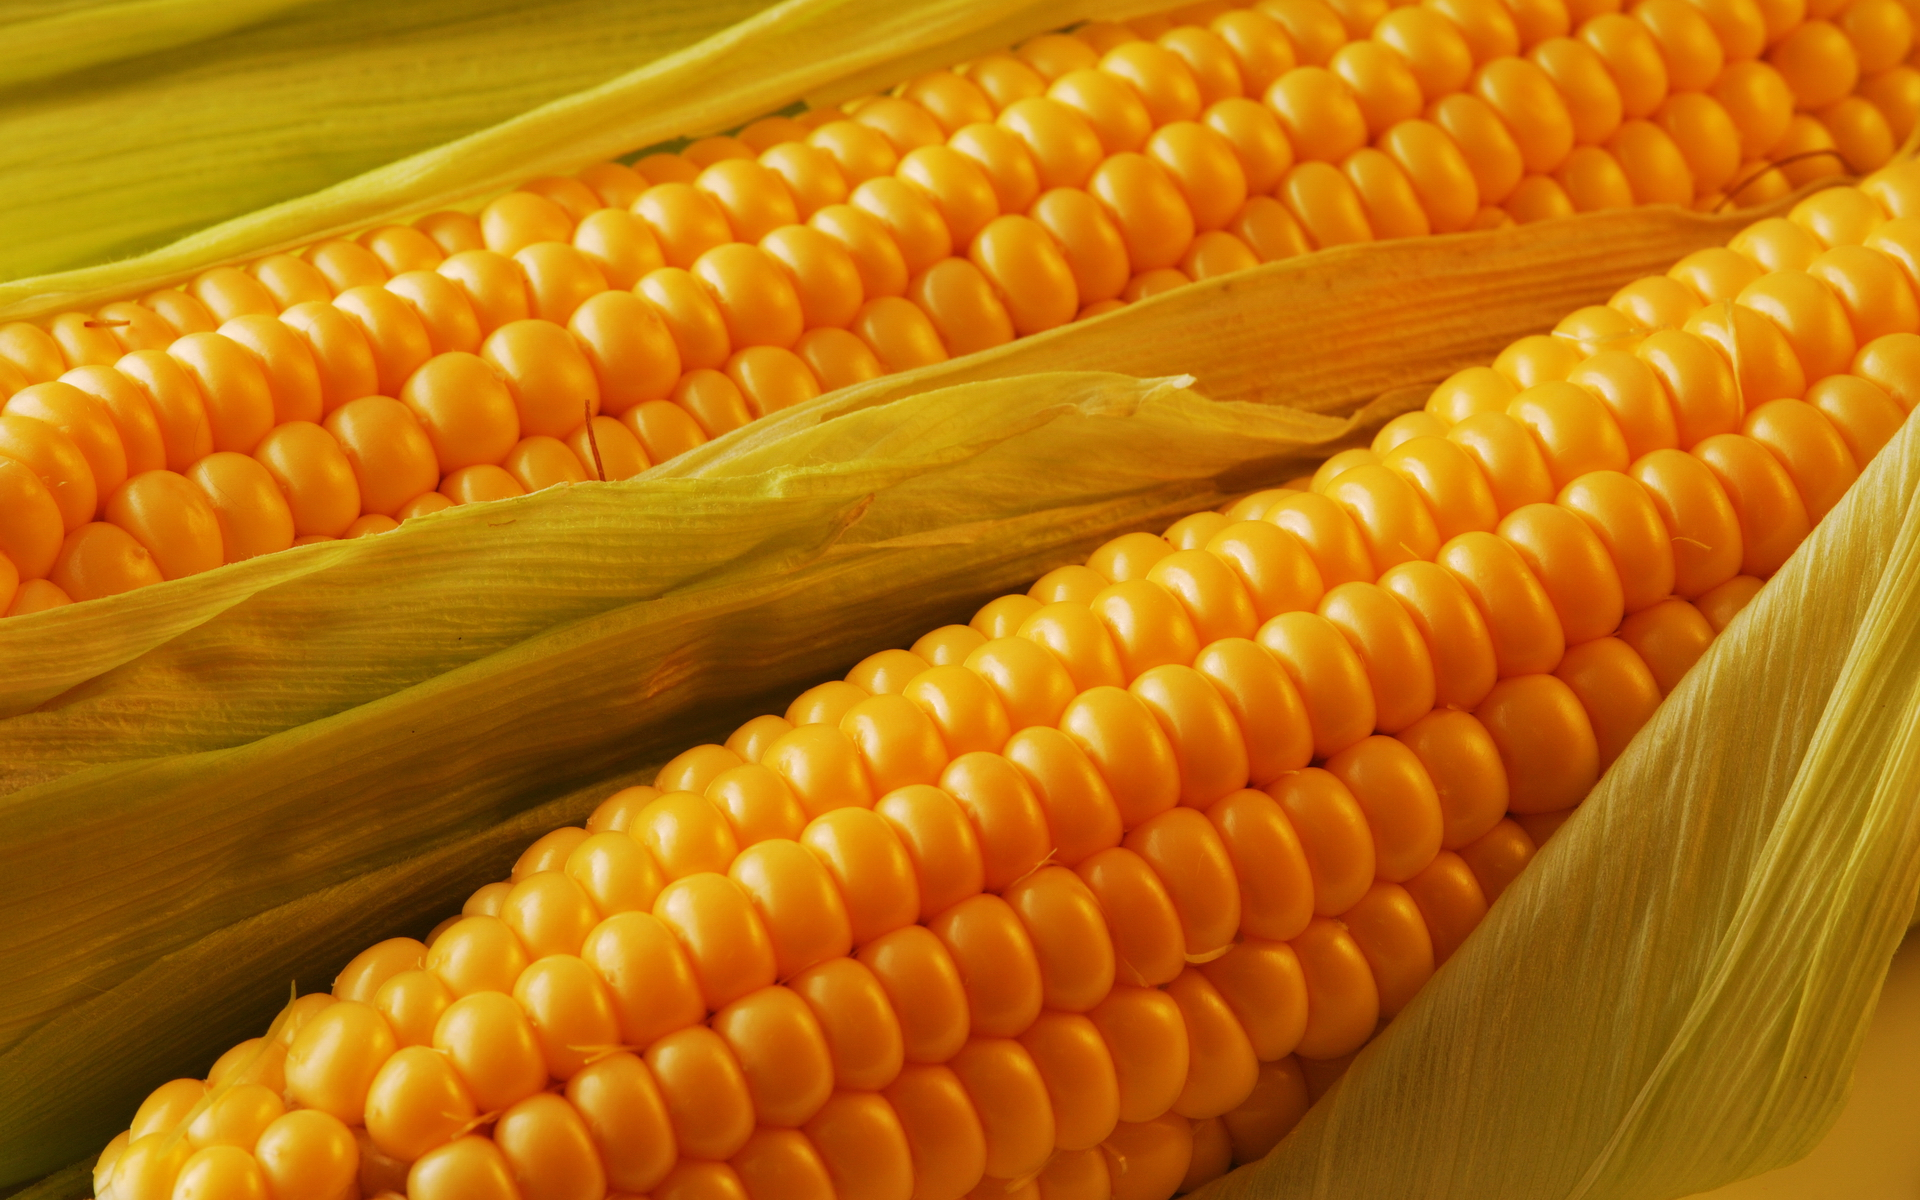

###  Datos del precio de cierre del maiz amarillo durante 12 meses. 05 de mayo 2017 - 04 de mayo 2018

  #### El precio que se muestra es en dólares estadounidenses por bushel. El precio actual del maíz a partir del 4 de mayo de 2018 es de $ 4.0625 por bushel.

In [1]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats 
from scipy.stats import norm

In [2]:
maiz = 'precios/SM.csv'
st_maiz = pd.read_csv(maiz)
#st_maiz

Text(0,0.5,'$ Precio $')

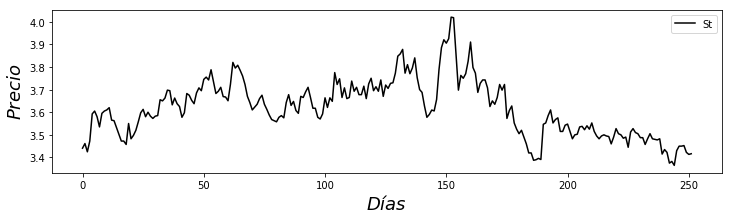

In [23]:
st_maiz.plot(figsize=(12,3), c= 'k');
plt.xlabel('$Días$', fontsize = 18)
plt.ylabel('$ Precio $', fontsize = 18)

Se obtendra la Volatilidad de los precio para calcular el precio de una opcion europea primero con el metodo BYS antes de valuar el intrumento exotico(O. Asiatica)

Formula empleada para la volatilidad.
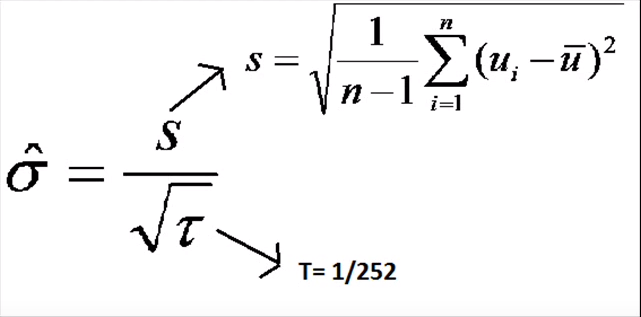

NOTA: El calculo de la volatididad fue hecho en excel por practicidad archivo anexo en el trabajo

In [4]:
def mu_std_daily_ret(st_maiz):
    daily_returns = (np.log(st_maiz/st_maiz.shift(1)))[1:]
    mu = daily_returns.mean().values[0]
    sigma = daily_returns.std().values[0]
    return daily_returns, mu, sigma

In [5]:
daily_returns, mu, sigma = mu_std_daily_ret(st_maiz)

Text(0,0.5,'$ Rendimientos $')

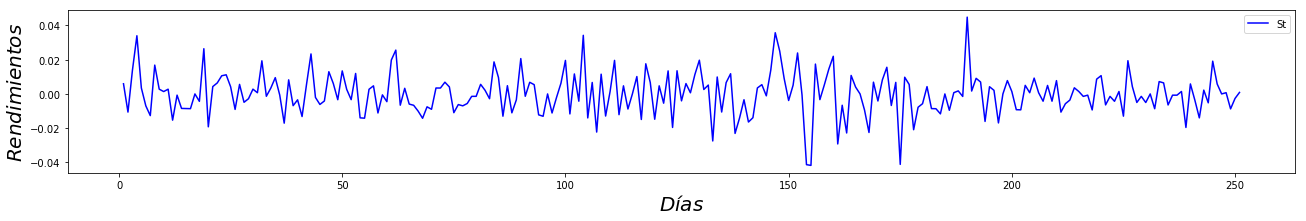

In [24]:
# Rendimientos Diarios de los precios del maiz amarillo en un año.
daily_returns.plot(figsize=(22,3), c='b');
plt.xlabel('$Días$', fontsize = 20)
plt.ylabel('$ Rendimientos $', fontsize = 20)

## Proyecciones de los precios del maiz amarillo durante el tiempo de la opcion que es 6 meses

In [7]:
# Función que simula varios escenarios de rendimientos diarios
def daily_ret_sim(mu, sigma, ndays, ntraj, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(sigma*np.random.randn(ndays, ntraj)+mu, index = dates)

In [8]:
# Simulamos 100 escenarios para todo el 2018
ndays = 63
ntraj = 10000
start_date = '2018-05-04'
simret = daily_ret_sim(mu, sigma, ndays, ntraj, start_date)

In [9]:
# Función de proyección de precios
def STFuturos(simret, st_maiz):
    return (st_maiz.iloc[-1,:].values[0])*np.exp(simret.cumsum())

In [21]:
# Proyección de precios
simdata = STFuturos(simret, st_maiz)
simdata

0         1         2         3         4         5     \
2018-05-04  3.414452  3.358950  3.422789  3.346010  3.504720  3.452198   
2018-05-05  3.397620  3.362175  3.480352  3.389804  3.479273  3.396394   
2018-05-06  3.450244  3.323189  3.438869  3.410924  3.510473  3.344654   
2018-05-07  3.406786  3.278592  3.476825  3.442195  3.527799  3.280799   
2018-05-08  3.427731  3.230701  3.425317  3.356140  3.527771  3.295643   
2018-05-09  3.369577  3.218437  3.541559  3.371179  3.511061  3.248855   
2018-05-10  3.427977  3.208215  3.505106  3.318235  3.519961  3.273527   
2018-05-11  3.452415  3.262254  3.608219  3.259100  3.508283  3.321326   
2018-05-12  3.434644  3.306940  3.646480  3.214573  3.553035  3.291001   
2018-05-13  3.400977  3.269573  3.602171  3.242138  3.543733  3.324982   
2018-05-14  3.424824  3.292388  3.580990  3.235967  3.590012  3.310551   
2018-05-15  3.472968  3.327078  3.546652  3.261041  3.609451  3.332648   
2018-05-16  3.466602  3.278865  3.554415  3.272149  3.627966  3.291770   
2018-05-17  3.517713  3.411466  3.582768  3.318937  3.577346  3.243975   
2018-05-18  3.534005  3.395438  3.550903  3.369703  3.658457  3.261610   
2018-05-19  3.555232  3.360956  3.574457  3.353791  3.645180  3.237720   
2018-05-20  3.560884  3.431599  3.634790  3.321989  3.619722  3.237578   
2018-05-21  3.526454  3.368557  3.584011  3.328259  3.669315  3.227118   
2018-05-22  3.532507  3.319710  3.529857  3.343547  3.613852  3.193626   
2018-05-23  3.523156  3.371251  3.488951  3.380212  3.617380  3.146526   
2018-05-24  3.534227  3.367742  3.477447  3.433803  3.568778  3.089866   
2018-05-25  3.501425  3.353425  3.497627  3.412736  3.572651  3.108324   
2018-05-26  3.517102  3.345290  3.454038  3.435848  3.594871  3.077143   
2018-05-27  3.502995  3.357021  3.495310  3.421727  3.623524  3.047249   
2018-05-28  3.521047  3.320797  3.572422  3.444693  3.595775  3.092489   
2018-05-29  3.521161  3.332156  3.541108  3.418835  3.601770  3.101910   
2018-05-30  3.527302  3.327940  3.509237  3.501440  3.623953  3.113188   
2018-05-31  3.529293  3.388637  3.576415  3.484327  3.628445  3.132033   
2018-06-01  3.504772  3.427748  3.671890  3.479453  3.662732  3.109834   
2018-06-02  3.429480  3.358746  3.677051  3.498818  3.698299  3.122351   
...              ...       ...       ...       ...       ...       ...   
2018-06-06  3.409086  3.366931  3.853749  3.510669  3.781788  3.169719   
2018-06-07  3.481231  3.378652  3.880169  3.407991  3.807332  3.106240   
2018-06-08  3.487751  3.393086  3.876488  3.444239  3.763129  3.088763   
2018-06-09  3.401676  3.416188  3.873189  3.432830  3.818595  3.096720   
2018-06-10  3.458098  3.400979  3.844380  3.468339  3.871255  3.051884   
2018-06-11  3.412357  3.425639  3.818565  3.443561  3.870829  3.077938   
2018-06-12  3.311563  3.436418  3.767073  3.401927  3.916962  3.049541   
2018-06-13  3.376687  3.431997  3.804213  3.463841  3.967967  3.052513   
2018-06-14  3.349900  3.459610  3.847255  3.467610  3.973147  3.060621   
2018-06-15  3.305327  3.508470  3.890010  3.559012  3.930754  3.087076   
2018-06-16  3.329192  3.537848  3.921626  3.553141  3.923946  3.072031   
2018-06-17  3.316526  3.509161  3.979854  3.561162  3.955729  3.113965   
2018-06-18  3.392876  3.532931  4.021773  3.517255  3.992734  3.122136   
2018-06-19  3.374775  3.563544  4.016470  3.461642  4.011584  3.079252   
2018-06-20  3.320498  3.568647  4.035182  3.488638  3.930422  3.121326   
2018-06-21  3.298301  3.607689  4.044329  3.453292  3.935886  3.167422   
2018-06-22  3.311892  3.566619  4.129913  3.466940  3.964998  3.090241   
2018-06-23  3.304960  3.605829  4.069710  3.514826  3.908244  3.113719   
2018-06-24  3.324640  3.599211  4.072282  3.564288  4.009558  3.099200   
2018-06-25  3.283669  3.557621  4.058394  3.613447  4.023494  3.094567   
2018-06-26  3.274959  3.507612  3.987427  3.676397  4.025275  3.112248   
2018-06-27  3.276108  3.445402  3.929823  3.693833  4.083306  3.111207   
2018-06-28  3.245674

In [25]:
simdata0 = simdata[0]
simdata0

2018-05-04    3.414452
2018-05-05    3.397620
2018-05-06    3.450244
2018-05-07    3.406786
2018-05-08    3.427731
2018-05-09    3.369577
2018-05-10    3.427977
2018-05-11    3.452415
2018-05-12    3.434644
2018-05-13    3.400977
2018-05-14    3.424824
2018-05-15    3.472968
2018-05-16    3.466602
2018-05-17    3.517713
2018-05-18    3.534005
2018-05-19    3.555232
2018-05-20    3.560884
2018-05-21    3.526454
2018-05-22    3.532507
2018-05-23    3.523156
2018-05-24    3.534227
2018-05-25    3.501425
2018-05-26    3.517102
2018-05-27    3.502995
2018-05-28    3.521047
2018-05-29    3.521161
2018-05-30    3.527302
2018-05-31    3.529293
2018-06-01    3.504772
2018-06-02    3.429480
                ...   
2018-06-06    3.409086
2018-06-07    3.481231
2018-06-08    3.487751
2018-06-09    3.401676
2018-06-10    3.458098
2018-06-11    3.412357
2018-06-12    3.311563
2018-06-13    3.376687
2018-06-14    3.349900
2018-06-15    3.305327
2018-06-16    3.329192
2018-06-17    3.316526
2018-06-18 

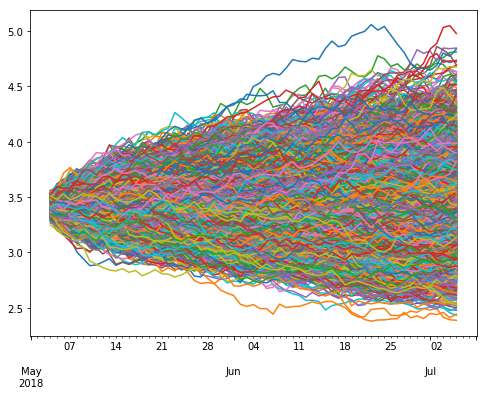

In [11]:
# Gráfico
simdata.plot(figsize=(8,6),legend=False);

#### Datos a utilizar para el calculo con BYS

In [12]:
#Volatilidad(calculada en excel)
sigma = 0.17
#Tasa libre de riesgo
r= 0.0175
#Dia: 07 de mayo 2018
S0=3.4165
# Promedio geometrico de los precios de cierre durante la vida de la opcion.
k= scipy.stats.mstats.gmean(simdata)
t= 3/12

In [13]:
nn=np.mean(k)
nn

3.4170939004528904

In [14]:
d1= (np.log(S0/nn)+ (r + ((sigma**2)/2))*(t))/ sigma*((t)**(.5))
d2= d1 - (sigma*((t)**(.5)))
d1, d2

(0.02298141795514646, -0.06201858204485355)

In [15]:
n1= norm.cdf(d1)
n2= norm.cdf(d2)
n1,n2

(0.5091674523205586, 0.47527401707681893)

In [16]:
c = (S0*np.exp(-r*t)*n1)-(nn*np.exp(-r*t)*n2)
c

0.11501038333691627

# Valuacion de la opcion asiatica por Monte Carlo

### La formula empleada para valuar con montecarlo es la siguiente.
 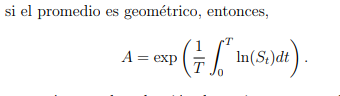

In [17]:
# Paso1: obtener en LN de St maiz 
def f1(st_maiz):
    return np.log(st_maiz)
#f1(st_maiz)

In [18]:
# Paso2: Por medio de numeros aleatorios generados por el Modelo Montecarlo aproximaremos la integral con N numero de pasos.
N = 100000000
t = np.random.uniform(0, 1, N)
integral= np.sum(f1(st_maiz))/N
#integral

In [19]:
#Paso3: Dividimos la integral entre (1/T)
n= integral /(1/(3/12))
V0= np.exp(n)
V0

St    1.000001
dtype: float64